In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
import random
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from iso639 import languages
import user_agents
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo
import requests
import json
from geopy.distance import great_circle
from geopy.geocoders import Nominatim
from datasist.structdata import detect_outliers
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder 
from datetime import datetime
from sklearn.model_selection import train_test_split , cross_validate
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import r2_score , mean_squared_error , classification_report ,recall_score , precision_score , ConfusionMatrixDisplay , confusion_matrix
from sklearn.linear_model import Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB , BernoulliNB
from sklearn.svm import SVC , SVR
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.decomposition import PCA
%matplotlib inline


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#import data
raw_data=pd.read_csv('../data/interim/OnlineRetail.csv')
df=raw_data.copy()
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
308328,563950,23245,SET OF 3 REGENCY CAKE TINS,4,22-08-2011 10:39,4.95,12471.0,Germany
193991,553547,21731,RED TOADSTOOL LED NIGHT LIGHT,12,17-05-2011 15:48,1.65,12474.0,Germany
386007,570223,22893,MINI CAKE STAND T-LIGHT HOLDER,12,09-10-2011 13:11,0.42,15787.0,United Kingdom
539581,581439,22381,TOY TIDY PINK POLKADOT,2,08-12-2011 16:30,4.13,NaN,United Kingdom
274150,560885,21495,SKULLS AND CROSSBONES WRAP,25,21-07-2011 16:20,0.42,16188.0,United Kingdom


In [3]:
#cleansing
#investing
df.shape

(541909, 8)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [5]:
df.describe(include='O').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,31-10-2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,31-10-2011 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
#check duplicates
df.duplicated().sum()

5268

In [10]:
#handle duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
#check missing value
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [12]:
#check columns
#rename columns
df.columns=df.columns.str.lower().str.strip().str.replace(" ","_")
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [13]:
#drop unnecessary columns
#no need for  clustering phase
df.drop(['invoiceno','customerid'],axis=1,inplace=True)

In [14]:
#check duplicates again
df.duplicated().sum()

756

In [15]:
#handle duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [16]:
#check missing value again
df.isna().sum()

stockcode         0
description    1453
quantity          0
invoicedate       0
unitprice         0
country           0
dtype: int64

In [17]:
#check rows 
#check unique id and logic
#check object
for i in  df.select_dtypes('object'):
    print(f'for {i} : \n',df[i].value_counts())
    print('-'*60)

for stockcode : 
 85123A    2299
22423     2191
85099B    2143
47566     1719
20725     1620
          ... 
17001        1
85160a       1
m            1
85035b       1
20871        1
Name: stockcode, Length: 4070, dtype: int64
------------------------------------------------------------
for description : 
 WHITE HANGING HEART T-LIGHT HOLDER     2353
REGENCY CAKESTAND 3 TIER               2188
JUMBO BAG RED RETROSPOT                2143
PARTY BUNTING                          1719
LUNCH BAG RED RETROSPOT                1619
                                       ... 
rcvd be air temp fix for dotcom sit       1
SET 12 COLOURING PENCILS DOILEY           1
SET 36 COLOURING PENCILS DOILEY           1
 I LOVE LONDON MINI RUCKSACK              1
found some more on shelf                  1
Name: description, Length: 4223, dtype: int64
------------------------------------------------------------
for invoicedate : 
 31-10-2011 14:41    1114
08-12-2011 09:28     749
09-12-2011 10:03     731
05-12-

In [18]:
#feature engineering
#there is no domain knowledge feature,string operation , web users nor geospatial feature
df

,stockcode,description,quantity,invoicedate,unitprice,country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,United Kingdom
1,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,United Kingdom
...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,France
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,France
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,France
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,France


In [19]:
#data and time feature
df['invoicedate']=pd.to_datetime(df['invoicedate'],errors='coerce')

In [20]:
df['year']=df['invoicedate'].dt.year
df['month']=df['invoicedate'].dt.month
df['day']=df['invoicedate'].dt.day
df['hour']=df['invoicedate'].dt.hour
df['minute']=df['invoicedate'].dt.minute

In [21]:
df

,stockcode,description,quantity,invoicedate,unitprice,country,year,month,day,hour,minute
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,United Kingdom,2010,1,12,8,26
1,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,United Kingdom,2010,1,12,8,26
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,United Kingdom,2010,1,12,8,26
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,United Kingdom,2010,1,12,8,26
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,United Kingdom,2010,1,12,8,26
...,...,...,...,...,...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,France,2011,9,12,12,50
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,France,2011,9,12,12,50
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,France,2011,9,12,12,50
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,France,2011,9,12,12,50


In [22]:
#drop unnecessary columns ---> no need for EDA or ML Phase
df.drop('invoicedate',axis=1,inplace=True)

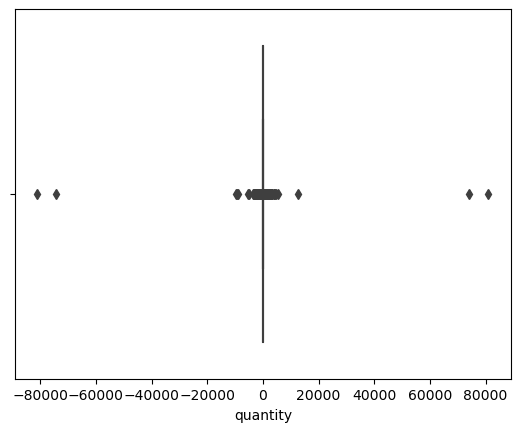

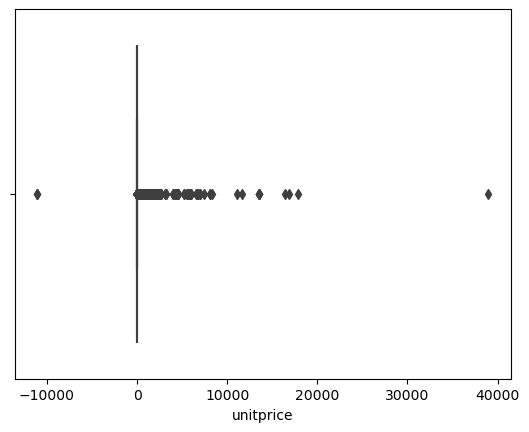

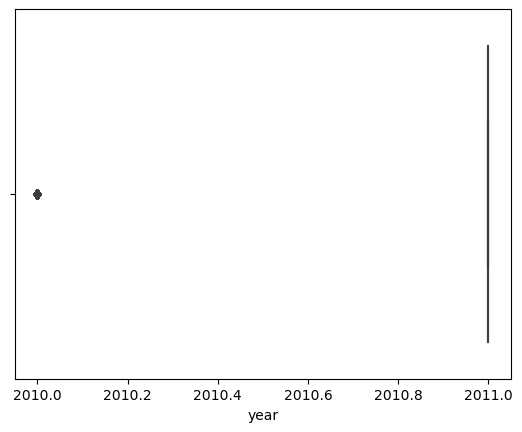

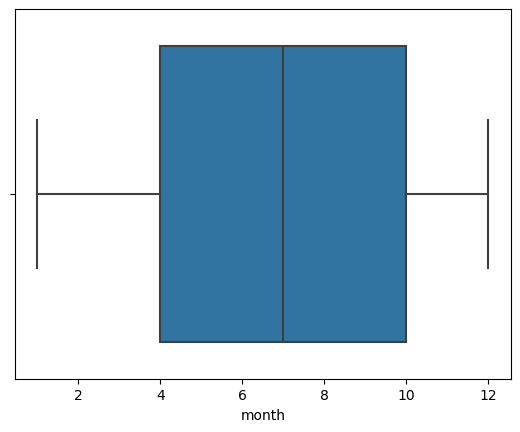

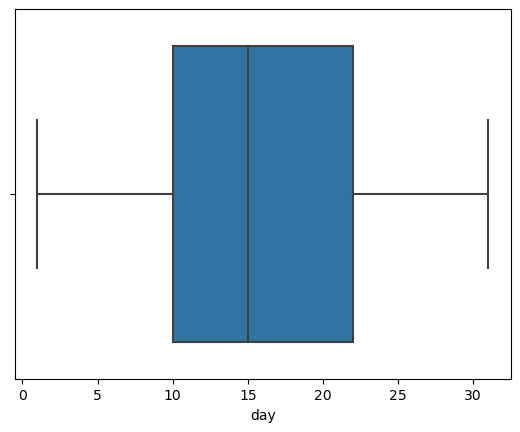

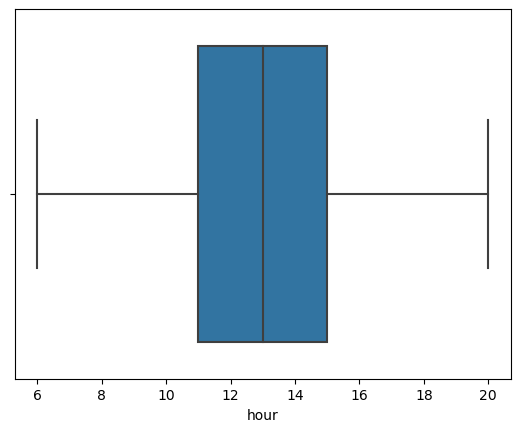

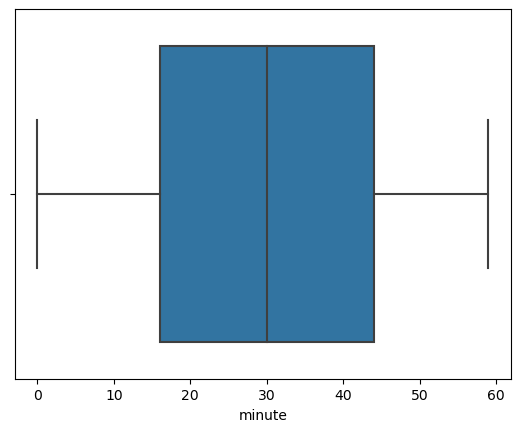

In [23]:
#detec and handle outliers
#donto forget that outliers are based on numeric features onlys
#detect
for i in df.select_dtypes('number').columns:
    plt.figure()
    sns.boxplot(df[i])

In [24]:
df.select_dtypes('number').columns

Index(['quantity', 'unitprice', 'year', 'month', 'day', 'hour', 'minute'], dtype='object')

In [25]:
#handle outliers
indexes=detect_outliers(df,0,['quantity', 'unitprice'])
indexes

[9,
 26,
 27,
 30,
 31,
 32,
 34,
 35,
 36,
 37,
 39,
 40,
 42,
 43,
 44,
 46,
 65,
 82,
 83,
 96,
 97,
 98,
 99,
 101,
 102,
 105,
 111,
 112,
 139,
 147,
 156,
 160,
 161,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 209,
 210,
 214,
 215,
 217,
 218,
 219,
 220,
 221,
 222,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 236,
 237,
 238,
 241,
 251,
 253,
 254,
 255,
 256,
 257,
 260,
 262,
 265,
 266,
 267,
 268,
 276,
 277,
 297,
 298,
 382,
 383,
 384,
 385,
 387,
 393,
 406,
 407,
 408,
 409,
 410,
 414,
 415,
 435,
 436,
 448,
 462,
 464,
 469,
 473,
 479,
 512,
 513,
 564,
 622,
 683,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 739,
 743,
 755,
 763,
 765,
 768,
 769,
 774,
 779,
 868,
 869,
 870,
 871,
 875,
 876,
 877,
 937,
 938,
 940,
 943,
 944,
 1079,
 1082,
 1115,
 1194,
 1213,
 1214,
 1215,
 1216,
 1217,
 1221,
 1223,
 1228,
 1229,
 1236,
 1237,
 1240,
 1241,
 1242,
 1243,
 1244,
 1245,
 1246,
 1247,
 1248,
 1249,
 1250,
 1251,
 1252,
 1253,
 1254

In [26]:
#lenght of outliers indexes
len(indexes)

97365

In [27]:
df.drop(indexes,axis=0,inplace=True)

In [28]:
df.reset_index(inplace=True)
df

,index,stockcode,description,quantity,unitprice,country,year,month,day,hour,minute
0,0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010,1,12,8,26
1,1,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,2010,1,12,8,26
2,2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010,1,12,8,26
3,3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,2010,1,12,8,26
4,4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,2010,1,12,8,26
...,...,...,...,...,...,...,...,...,...,...,...
438515,541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,France,2011,9,12,12,50
438516,541905,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,France,2011,9,12,12,50
438517,541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,France,2011,9,12,12,50
438518,541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,France,2011,9,12,12,50


In [29]:
df.drop('index',axis=1,inplace=True)

<AxesSubplot:>

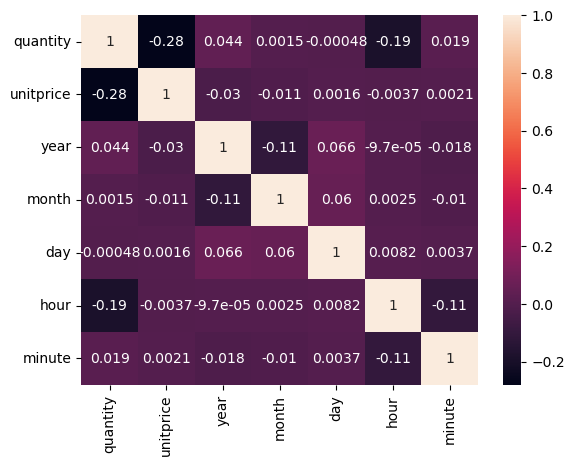

In [30]:
#correlation
sns.heatmap(df.select_dtypes('number').corr(), annot=True )

In [31]:
#hanle na values
df.isna().sum()

stockcode        0
description    801
quantity         0
unitprice        0
country          0
year             0
month            0
day              0
hour             0
minute           0
dtype: int64

In [32]:
df['description']=df['description'].fillna('no description')
df.isna().sum()

stockcode      0
description    0
quantity       0
unitprice      0
country        0
year           0
month          0
day            0
hour           0
minute         0
dtype: int64

In [33]:
#star clustering
x=df.copy()
x.drop(['stockcode','description'],axis=1,inplace=True)
x

,quantity,unitprice,country,year,month,day,hour,minute
0,6,2.55,United Kingdom,2010,1,12,8,26
1,6,3.39,United Kingdom,2010,1,12,8,26
2,8,2.75,United Kingdom,2010,1,12,8,26
3,6,3.39,United Kingdom,2010,1,12,8,26
4,6,3.39,United Kingdom,2010,1,12,8,26
...,...,...,...,...,...,...,...,...
438515,12,0.85,France,2011,9,12,12,50
438516,6,2.10,France,2011,9,12,12,50
438517,4,4.15,France,2011,9,12,12,50
438518,4,4.15,France,2011,9,12,12,50


In [34]:
#encoding
#work with categorical data 
#check and decide the encoding stategy
#update objects list
lst_obj=[]
for i in x.columns :
    if x[i].dtype == 'O':
        lst_obj.append(i)
for i in lst_obj:
    print(f"for feature {i}\n",x[i].value_counts())
    print()
    print("-----------------------------------------------------------------------------")

for feature country
 United Kingdom          406823
Germany                   7012
France                    6356
EIRE                      5643
Spain                     1910
Belgium                   1539
Switzerland               1371
Portugal                  1225
Norway                     661
Italy                      618
Channel Islands            531
Australia                  530
Netherlands                507
Cyprus                     473
Finland                    468
Unspecified                361
Austria                    318
Poland                     247
USA                        216
Denmark                    211
Sweden                     201
Israel                     185
Hong Kong                  170
Iceland                    141
Singapore                  123
Greece                     116
Japan                      115
Canada                     102
Malta                       96
RSA                         49
United Arab Emirates        49
European Community

In [35]:
#create pipeline in next steps

In [36]:
#encoding  using column transformer
#binary encoding
#name,object,data
ce=BinaryEncoder()
ce_1=ce.fit_transform(x['country'])
x=pd.concat([x,ce_1],axis=1)
x.drop('country',axis=1,inplace=True)
x

,quantity,unitprice,year,month,day,hour,minute,country_0,country_1,country_2,country_3,country_4,country_5
0,6,2.55,2010,1,12,8,26,0,0,0,0,0,1
1,6,3.39,2010,1,12,8,26,0,0,0,0,0,1
2,8,2.75,2010,1,12,8,26,0,0,0,0,0,1
3,6,3.39,2010,1,12,8,26,0,0,0,0,0,1
4,6,3.39,2010,1,12,8,26,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438515,12,0.85,2011,9,12,12,50,0,0,0,0,1,0
438516,6,2.10,2011,9,12,12,50,0,0,0,0,1,0
438517,4,4.15,2011,9,12,12,50,0,0,0,0,1,0
438518,4,4.15,2011,9,12,12,50,0,0,0,0,1,0


In [37]:
#pipeline with encoding then dropping the original columns of encoding then scaling
std=StandardScaler()
x_scaled=std.fit_transform(x)

In [38]:
x_scaled

array([[ 0.251485  , -0.0770284 , -3.46595572, ..., -0.20193962,
        -0.21134055,  0.23005383],
       [ 0.251485  ,  0.35771875, -3.46595572, ..., -0.20193962,
        -0.21134055,  0.23005383],
       [ 0.68384246,  0.02648283, -3.46595572, ..., -0.20193962,
        -0.21134055,  0.23005383],
       ...,
       [-0.18087246,  0.75106141,  0.28852071, ..., -0.20193962,
         4.73169956, -4.34680876],
       [-0.18087246,  0.75106141,  0.28852071, ..., -0.20193962,
         4.73169956, -4.34680876],
       [-0.39705119,  1.16510632,  0.28852071, ..., -0.20193962,
         4.73169956, -4.34680876]])

Text(0, 0.5, 'inertia')

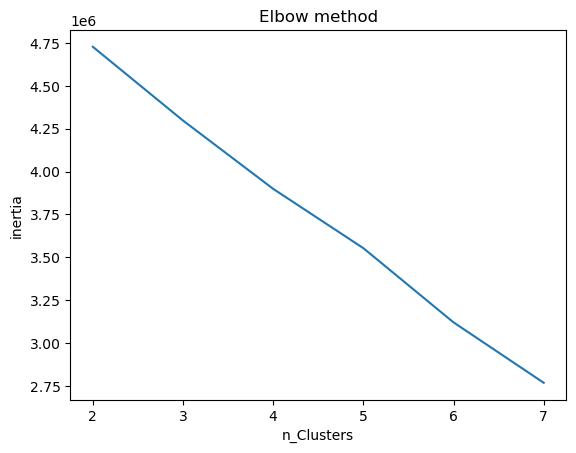

In [39]:
#modeling ---> donot forget to scale before modeling
#model 1 ---> kmeans
#ELbow method to show the best choice of k
scores=[]
for i in range(2,8):
    model=KMeans(n_clusters=i)
    model.fit(x_scaled)
    intertia=model.inertia_
    scores.append(intertia)
plt.plot(range(2,8),scores)
plt.title('Elbow method')
plt.xlabel('n_Clusters')
plt.ylabel('inertia')

In [40]:
#kmeans model
#try with n = 4
#create k means object
model=KMeans(n_clusters=4)
clusters=model.fit_predict(x_scaled)

In [41]:
x['cluster-1']=clusters
x['cluster-1']

0         3
1         3
2         3
3         3
4         3
         ..
438515    2
438516    2
438517    2
438518    2
438519    2
Name: cluster-1, Length: 438520, dtype: int32

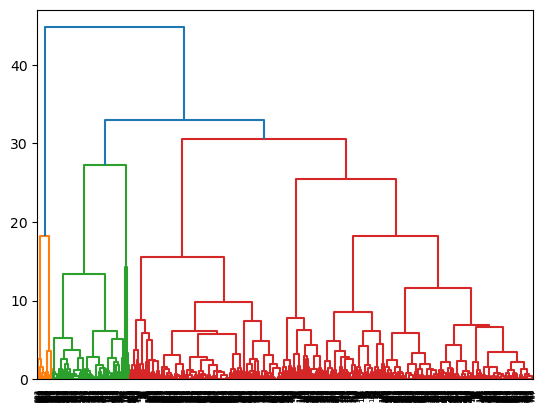

In [50]:
#modeling ---> donot forget to scale before modeling
#model 2 ---> aggromalative model
#draw dendrogram to know number of clusters ,just 1k rows so we can use dendrogram without timeout
dendrogram=sch.dendrogram(sch.linkage(x_scaled[:1000,:],method='ward'))
#it is clear that we have 3 clusters

In [55]:
#model 2 ---> agglomerative model
#try with n = 3 based on dendrogram
#just 10k rows so we can use dendrogram without timeout
model=AgglomerativeClustering(n_clusters=3)
clusters=model.fit_predict(x_scaled[:10000,:])
clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [ ]:
#model 3 ---> DBSCAN
model=DBSCAN(eps=0.5,min_samples=90)
clusters=model.fit_predict(x_scaled)
clusters

In [ ]:
df['clusters-2']=clusters

In [ ]:
#analytics